<a href="https://colab.research.google.com/github/groovies/cutter/blob/master/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
import numpy as np

In [50]:
data = pd.read_csv('weightdataset.csv',sep=';')
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [51]:
x = scale(data.Weight) 
y = scale(data.Height)

#n = len(x)
#X = np.c_[np.ones(n), x]

w_input = np.random.random(2)
w_out = np.random.random(1)
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.3)

In [52]:
def des(x):              #matrix
    n = len(x)
    X = np.c_[np.ones(n), x]
    return(X)

In [53]:
def hidden(p,w_in):
    h = p.dot(w_in)
    return(h)

In [54]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))  #sigmoid function

In [55]:
def der_sigmoid(x):
    return(sigmoid(x) * (1 - sigmoid(x))) #derivative of sigmoid

In [56]:
X_train = des(x_train) # Fitting training data to design Matrix 
X_test = des(x_test) # Fitting testing data to design matrix

u11 = hidden(X_train,w_input) # Calculating the output of the hidden without sigmoid
o11 = sigmoid(X_train) # Output of the sigmoid function, note: 011=y_pred

In [57]:
def y_w1(x,w): # Derivative of y_pred with respect to w1
    return((1/(1 + np.exp(-x*w)))*(1/(1 + np.exp(-x*w))) * x)

derivative = y_w1(X_test,w_input)

In [58]:
epochs = 1000
lr = 0.001
y_pred = sigmoid(X_test)


def optimize(y_i,y_pred,w,x,epochs, derivative,lr):
    
    cost = []
    weights = []
    
    nll = 0
    
    n = len(x)
    
    for i in range(epochs):
        
        
    
        y_i = y_i.reshape(len(y_i),1)
        
        nll = -np.sum((y_i *np.log(w) + (1 - y_i)*np.log(1 - w)))
        cost.append(nll)
        
        
        w = w - (lr*(1/n)*sum(y_pred - y_i))
        weights.append(w)
        
    return(cost, weights)

In [59]:
error,updated_weights = optimize(y_test,y_pred,w_input,X_test,epochs,derivative,lr)
weights = updated_weights[-1] 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


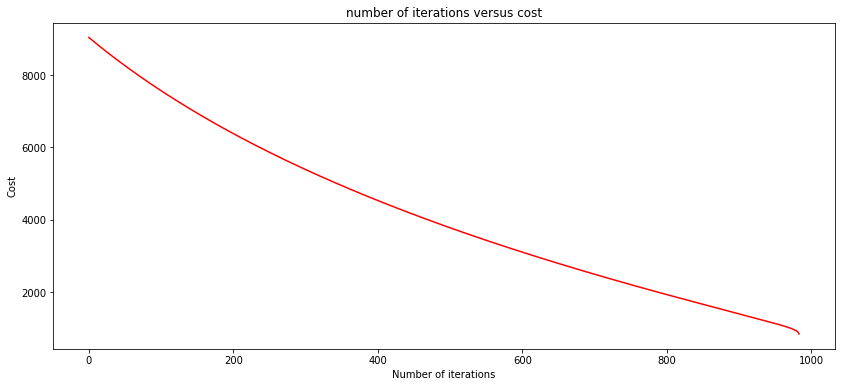

In [61]:
plt.figure(figsize=(14,6))  #negative loglikelihood
plt.plot(error, label='Loss', color = 'r')
plt.title('number of iterations versus cost')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()